<a href="https://colab.research.google.com/github/prabh505/Heart_Disease_Eda/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === 1. IMPORTS ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === 2. LOAD THE DATA ===
df = pd.read_csv("heart.csv")
print("Shape:", df.shape)
df.head()


Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
# Info about datatypes and nulls
df.info()

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldp

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0



Target distribution:


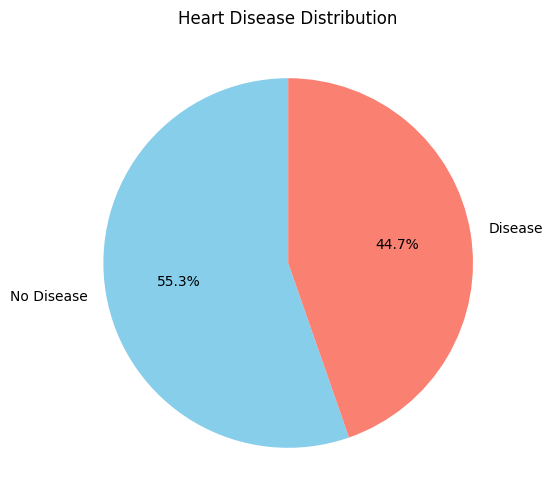

In [4]:
# Target variable
target_col = 'HeartDisease'
print("\nTarget distribution:")
df[target_col].value_counts()

# Pie Chart
plt.figure(figsize=(6,6))
df[target_col].value_counts().plot.pie(autopct="%1.1f%%", labels=["No Disease", "Disease"], startangle=90, colors=['skyblue', 'salmon'])
plt.title("Heart Disease Distribution")
plt.ylabel("")
plt.show()

In [5]:
# Categorical & Numerical features
categorical = [col for col in df.columns if df[col].nunique() <= 10 and df[col].dtype != 'float64']
numerical = [col for col in df.columns if col not in categorical and col != target_col]

print("Categorical features:", categorical)
print("Numerical features:", numerical)


Categorical features: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


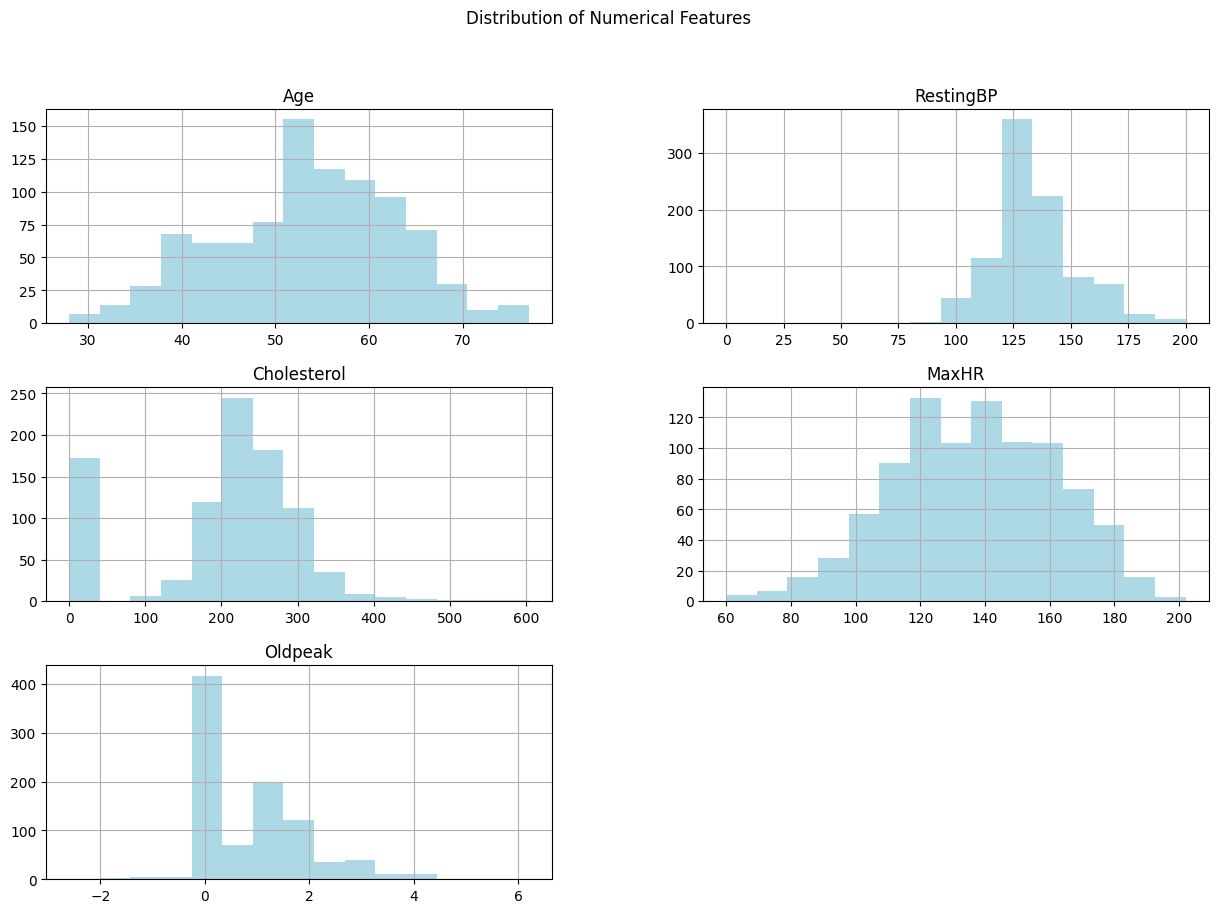

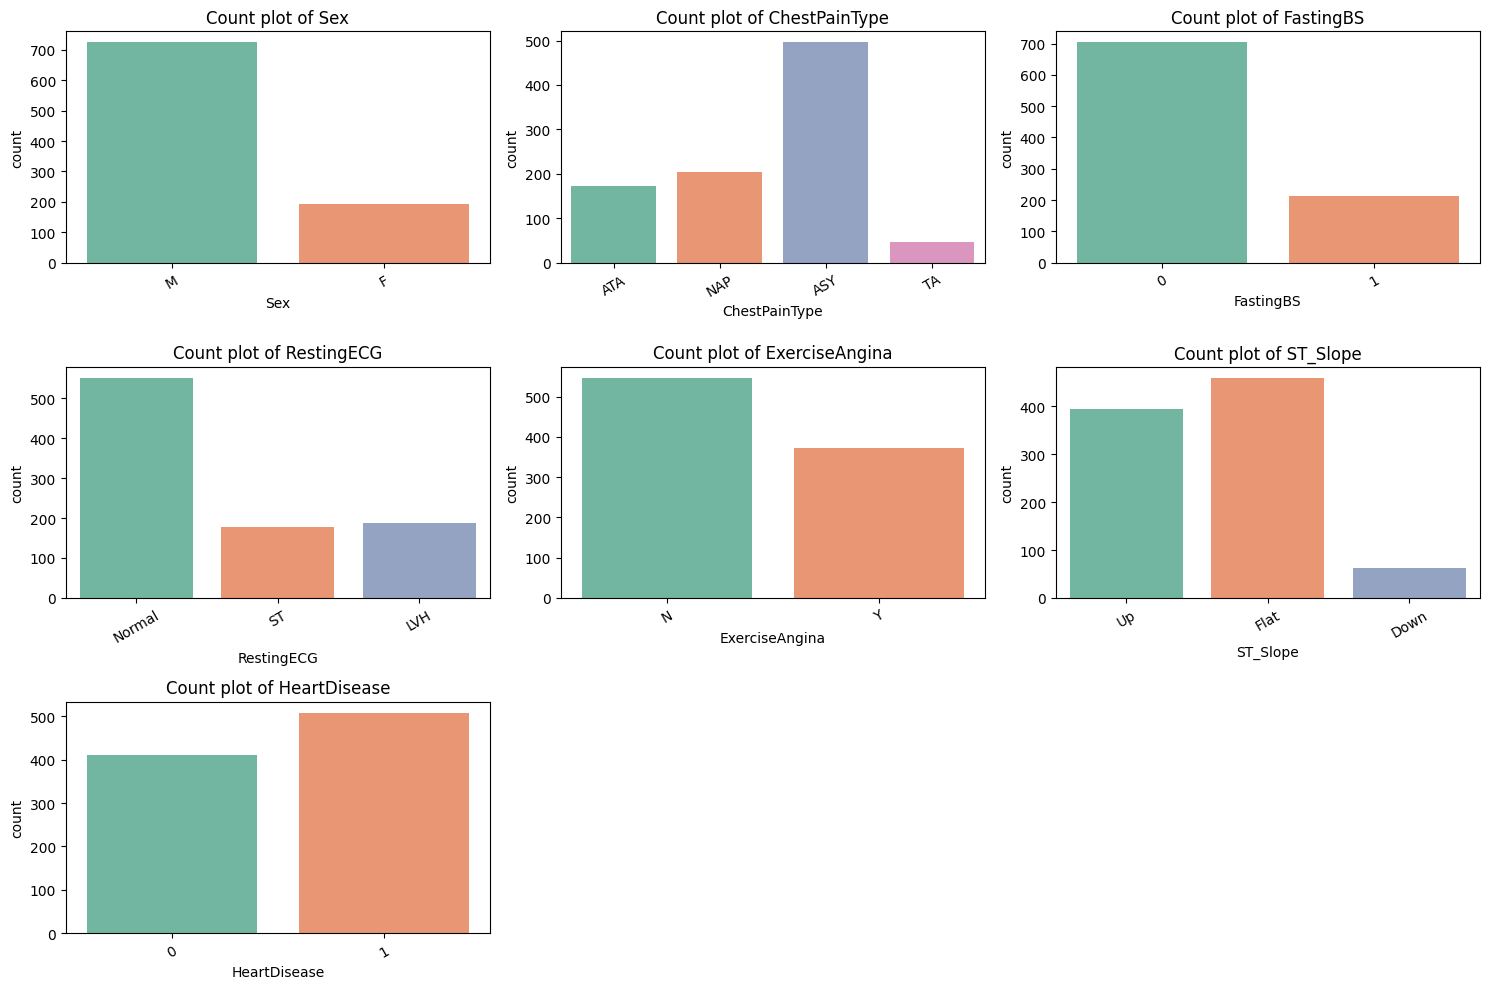

In [6]:
# Histograms for numerical features
df[numerical].hist(bins=15, figsize=(15, 10), color='lightblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


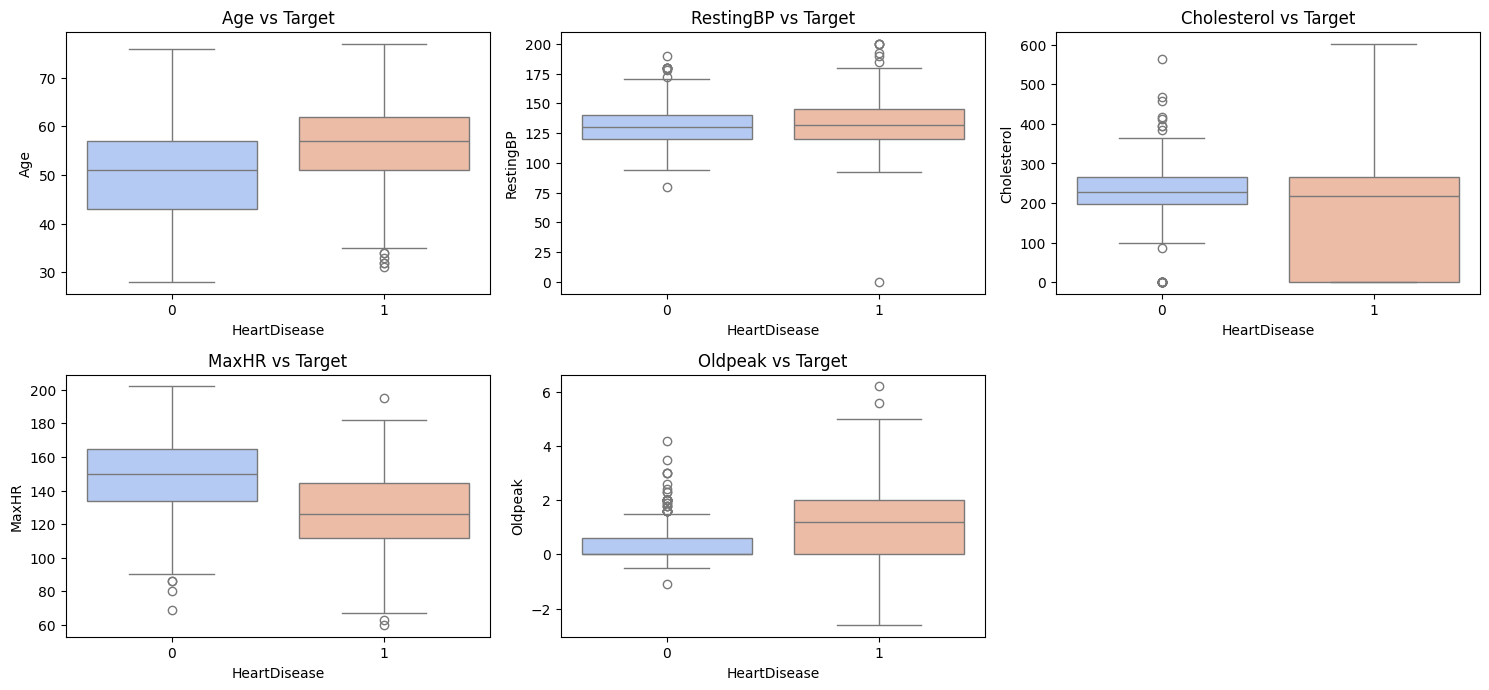

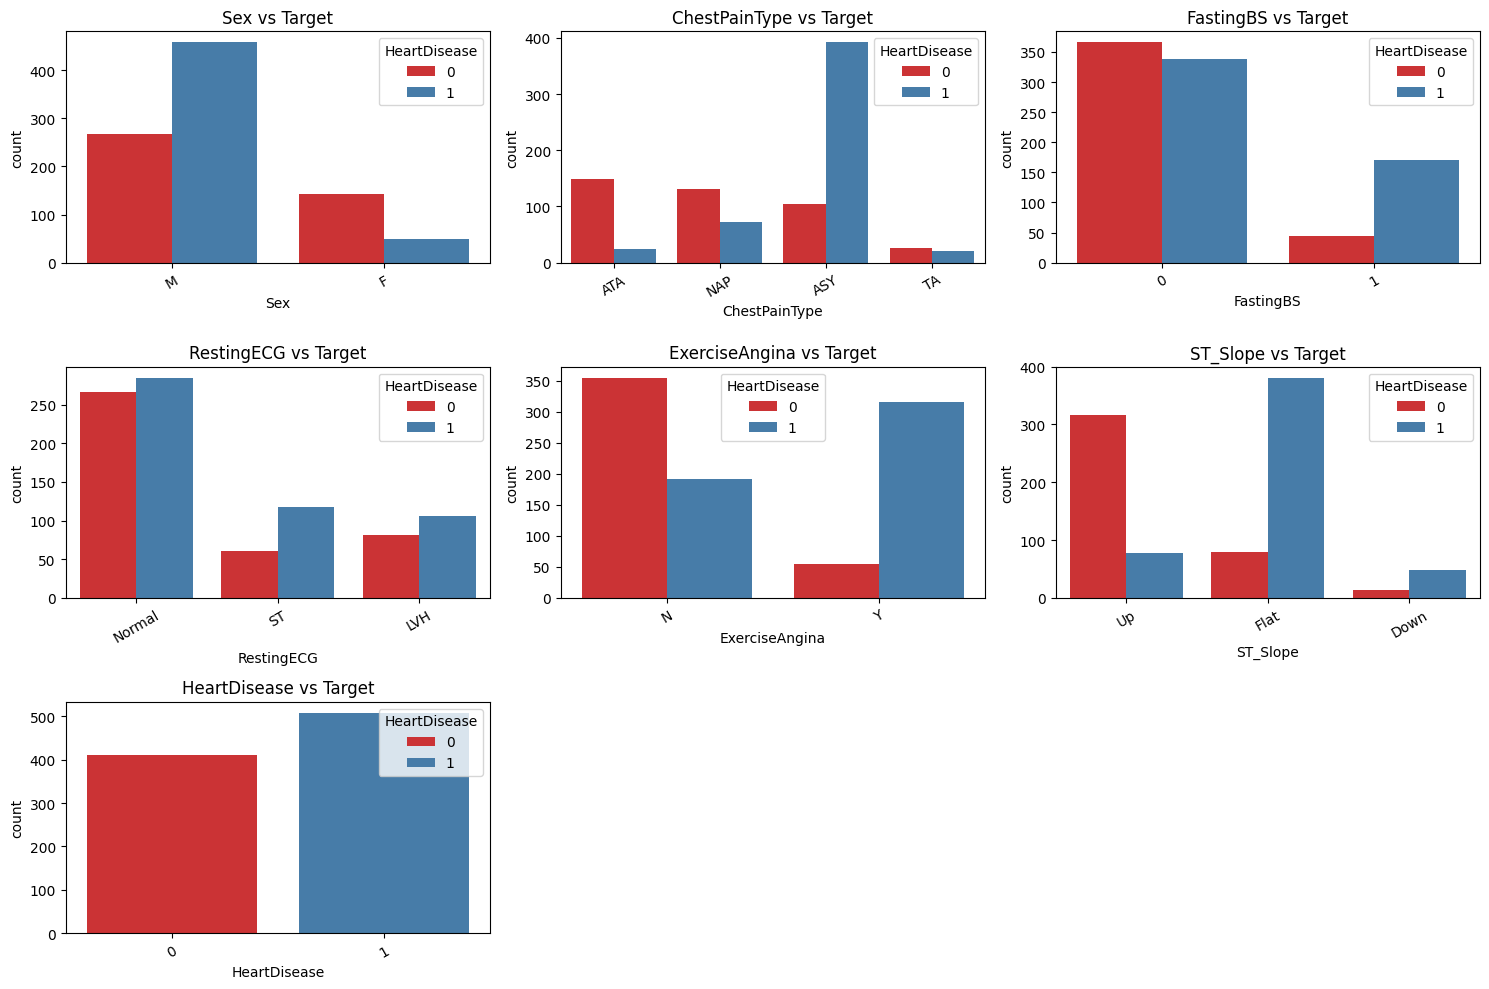

In [7]:
# Boxplots for numerical vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=target_col, y=col, data=df, palette='coolwarm')
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

# Countplots for categorical vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue=target_col, data=df, palette='Set1')
    plt.title(f"{col} vs Target")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


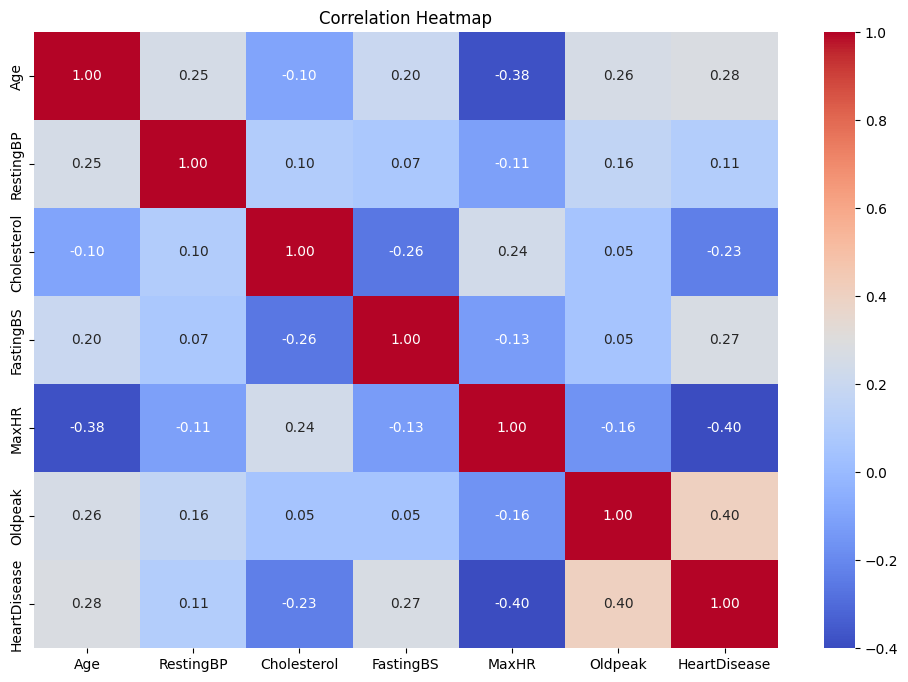

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=np.number).corr() # Select only numerical columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

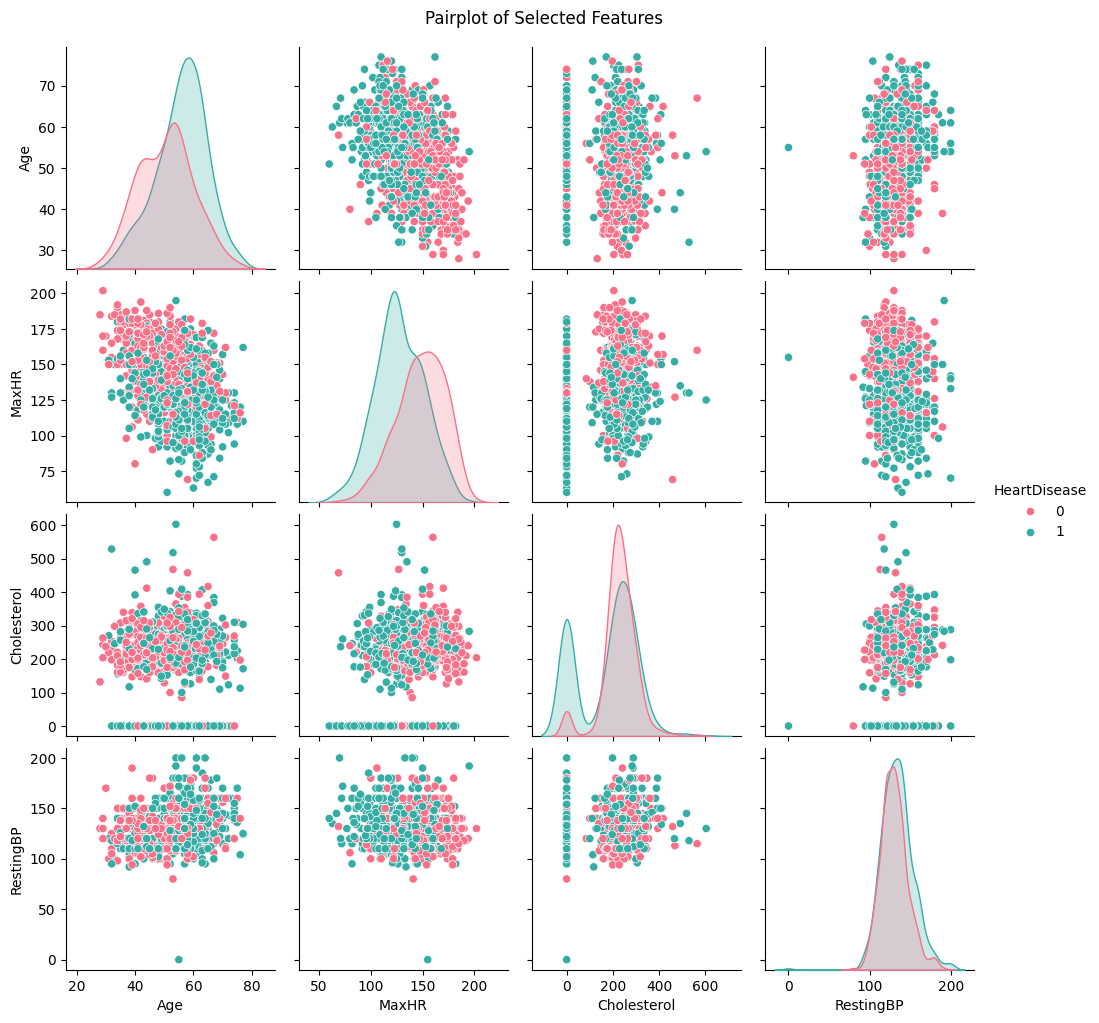

In [12]:
# Only selected numerical features
selected = ['Age', 'MaxHR', 'Cholesterol', 'RestingBP', 'HeartDisease']
sns.pairplot(df[selected], hue="HeartDisease", palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()